# Sensitivity Analysis Visualization
- 26-Dec-2024
- Use CI and std. dev. to indicate uncertainty
- Error bar = CI or std.dev values

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Utility functions

In [2]:
# Write heading to summary performance file
def write_heading(heading, report_file):
    from csv import writer
    with open(report_file, 'a', newline='') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(heading)
        f_object.close()

# Write summary performance to file
def write_perf_metrics(heading, metrics, report_file, round_decimals=8):
    from pathlib import Path
    
    write_heading([''], report_file)  
    write_heading(heading, report_file)   
    report_file = Path(report_file)
    report_file.parent.mkdir(parents=True, exist_ok=True)
    metrics = metrics.round(round_decimals)
    metrics.to_csv(report_file, mode='a')
    
    write_heading(['-----------------------------------------------------------------------'], report_file)  

In [26]:
def plot_error_bounds(x, y, title):
    import seaborn as sns
    sns.set()

    # Compute standard error
    sem = np.std(y, ddof=1) / np.sqrt(np.size(y))
    sd = np.std(y)

    plt.figure(figsize=(3, 4))
    center_line = plt.plot(x, y, 'b-')
    fill = plt.fill_between(x, y-sd, y+sd, color='b', alpha=0.2)
    plt.margins(x=0)
    plt.title(title)
    plt.show()
    plt.close()

In [29]:
def plot_CI_error_bounds(x, y, y_LB, y_UB, title):
    import seaborn as sns
    sns.set()

    plt.figure(figsize=(3, 4))
    center_line = plt.plot(x, y, 'b-')
    fill = plt.fill_between(x, y_LB,  y_UB, color='b', alpha=0.2)
    plt.margins(x=0)
    plt.title(title)
    plt.show()
    plt.close()

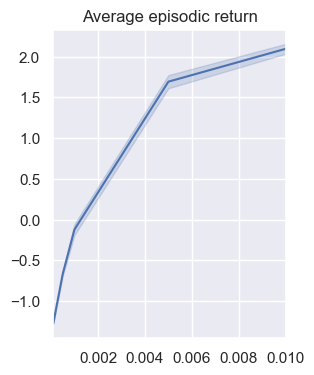

In [30]:
lr = [1.0E-02, 5.0E-03, 1.0E-03, 5.0E-04, 1.0E-04]
rewards = [2.097, 1.693, -0.123, -0.669, -1.273]
CI = [0.061, 0.081, 0.068, 0.026, 0.008]

LB = (rewards, [-1 * ci for ci in CI])
UB = (rewards, CI)

rewards_LB = [sum(values) for values in zip(*LB)]
rewards_UB = [sum(values) for values in zip(*UB)]

plot_CI_error_bounds(lr, rewards, rewards_LB, rewards_UB, 'Average episodic return')

# 'Learning Rate'
# 'Average_episodic return'

# plot_error_bounds

In [3]:
# Draw error bar plots across all training rounds
def error_plot(fig, ax, x, y, y_err, title, y_label, x_label, legend):
    TIME_STEP_TICK = 1
    X_LOW = -0.25
    X_UPPER = len(x)
    Y_LOW = 0.0
    Y_UPPER = 1.1
    Y_GRID = 0.25

    ax.errorbar(x, y, yerr=y_err, fmt='-o', alpha=0.5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title, fontsize=12)
    ax.set(ylim=[Y_LOW, Y_UPPER])
    ax.set_xticks(np.arange(0, X_UPPER, TIME_STEP_TICK))
    ax.set_xticklabels(x[::TIME_STEP_TICK], fontdict={'fontsize':10})
    
    ax.grid(alpha=0.25)
    ax.spines["top"].set_alpha(0)
    ax.spines["bottom"].set_alpha(.3)
    ax.spines["right"].set_alpha(0)
    ax.spines["left"].set_alpha(.3)
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(legend, loc='center left', bbox_to_anchor=(1, 0.8))
    pdf_file = title.replace('-', '')
    pdf_file = pdf_file.replace(' ', '_')
    fig.savefig(f'{pdf_file}.pdf', bbox_inches='tight')

In [4]:
# Draw multi-line plots for all algorithms
def multi_algorithm_plot(env_subset, env_label):
    # Create a figure with 1 row and 3 cols of subplots
    PLOT_H = 3
    PLOT_W = 20

    # define the standard algorithms and labels
    metric_key = ['Pr', 'Rc', 'F1', 'F05']
    algo_keys = ['REINFORCE', 'A2C', 'DQN', 'PPO']
    algos = {'REINFORCE':'RF', 'A2C':'A2C', 'DQN':'DQN', 'PPO':'PPO'}
    metrics = {'Pr':'Precision', 'Rc':'Recall', 'F1':'F-1 score', 'F05':'F-beta 0.5'}

    # X axis is fixed
    x_label = 'Training round'
    legend = algo_keys
    
    metrics_df = []
    
    for m in range(len(metric_key)):
        # Multi-line plots
        fig, ax = plt.subplots()

        fig.set_figheight(PLOT_H)
        fig.set_figwidth(PLOT_W)

        # axes = [ax1, ax2, ax3, ax4]
        for n in range(len(algo_keys)):
            m_key = metric_key[m]
            key = algos[algo_keys[n]] 
            mr_key = f'{key}_{m_key}'
            mr_sd_key = f'{key}_{m_key}_sd'
            mr = env_subset.groupby(['Round']).agg({mr_key :['mean']})
            mr_sd = env_subset.groupby(['Round']).agg({mr_sd_key :['mean']})

            y = mr.to_numpy().flatten().tolist()
            y_err = mr_sd.to_numpy().flatten().tolist()        
            y_label = metrics[m_key]
            title = f'{env_label} - {y_label}'

            x = [i for i in range(len(y))]
            error_plot(fig, ax, x, y, y_err, title, y_label, x_label, legend)            


### Singe state simple env

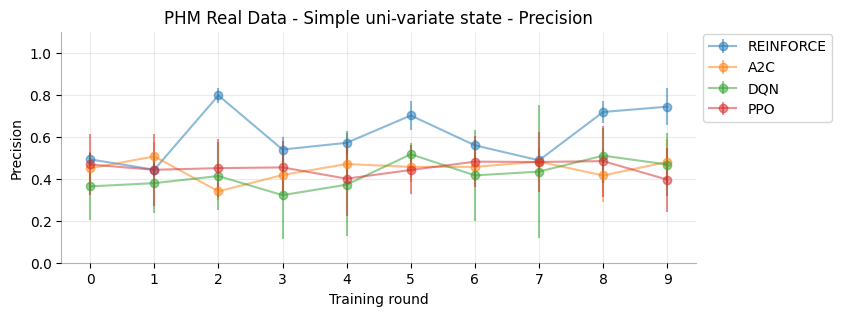

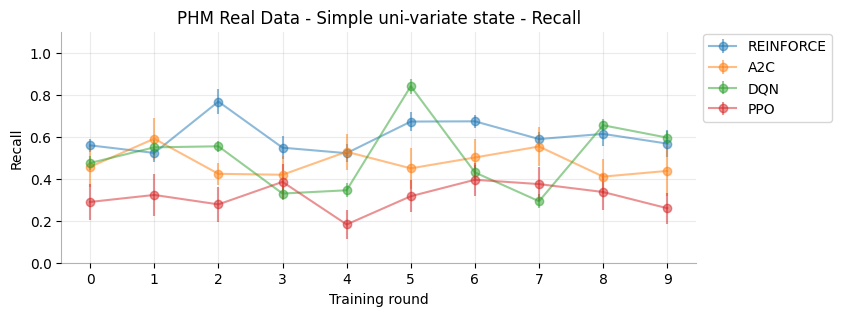

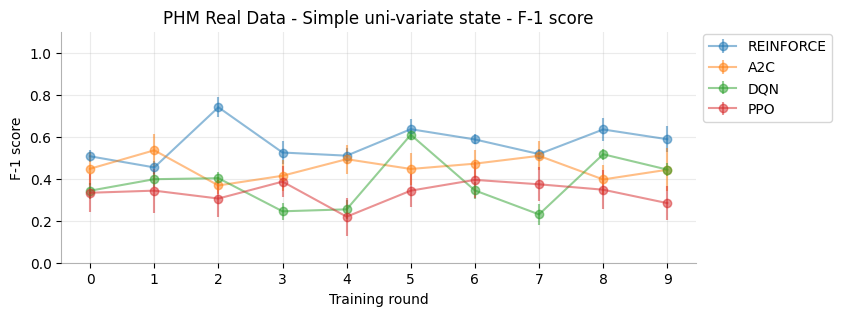

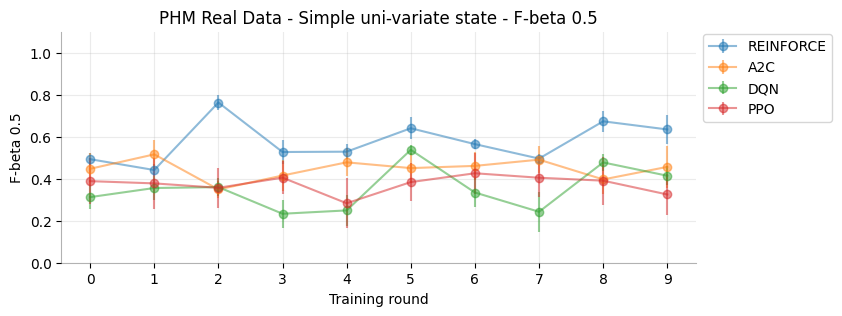

In [153]:
subset = ss_env
env_label = 'PHM Real Data - Simple uni-variate state'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

## Training times of algorithms across then entire experment

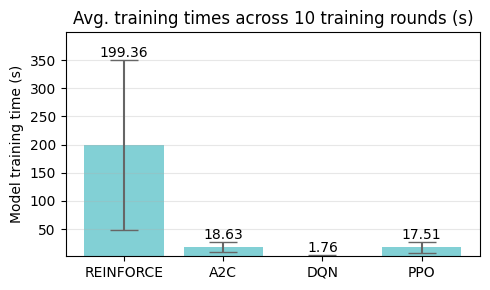

In [161]:
algo_keys = ['REINFORCE', 'A2C', 'DQN', 'PPO']
algos = {'REINFORCE':'RF', 'A2C':'A2C', 'DQN':'DQN', 'PPO':'PPO'}

RF_training_time = all_envs.agg({'RF_time':['mean','std']})
A2C_training_time = all_envs.agg({'A2C_time':['mean','std']})
DQN_training_time = all_envs.agg({'DQN_time':['mean','std']})
PPO_training_time = all_envs.agg({'PPO_time':['mean','std']})

# Create lists for the plot
x_pos = np.arange(len(algo_keys))
mean_training_time = [RF_training_time['RF_time']['mean'], A2C_training_time['A2C_time']['mean'], 
                      DQN_training_time['DQN_time']['mean'], PPO_training_time['PPO_time']['mean']]
error = [RF_training_time['RF_time']['std'], A2C_training_time['A2C_time']['std'], 
                      DQN_training_time['DQN_time']['std'], PPO_training_time['PPO_time']['std']]



# Build the plot
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(5)

max_y_lim = max(mean_training_time) + 200
min_y_lim = min(mean_training_time)
plt.ylim(min_y_lim, max_y_lim)

bars = ax.bar(x_pos, mean_training_time, yerr=error, align='center', alpha=0.5, color='#06A2AC', ecolor = '0.4', capsize=10)
ax.set_ylabel('Model training time (s)')
ax.set_xticks(x_pos)
ax.set_xticklabels(algo_keys)
ax.set_title('Avg. training times across 10 training rounds (s)')
ax.yaxis.grid(True, alpha=0.30)
ax.bar_label(bars, fmt='%.2f', label_type='edge')

# Save the figure and show
plt.tight_layout()
plt.savefig('Model_training_time.pdf', bbox_inches='tight')
plt.show()